# Introduction

My project consists of an analysis of the European Social Survey, focusing on the modules which measure attitudes to immigration in Ireland. 

### Description of dataset

The European Social Survey (ESS) is a cross-national survey which aims to monitor public attitudes within Europe. It is conducted every two years, and it has been administered in over 40 countries since 2001. Each round of the survey is designed to capture a cross-sectional random sample in each of the participating countries.

For this project, round X was used. For ireland only??? decide later.

### Research Questions
1) How has the average attitude to immigration changed in Ireland over time?
2) How does socio-economic background (e.g. income level, educational attainment) relate to attitudes to immigration in Ireland?

### Part 1: Reading in the data

In [3]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats # statistical functions
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

At this point, I am setting my notebook to [ignore certain warnings](https://www.geeksforgeeks.org/python/how-to-disable-python-warnings/) in order to perserve tidiness.

In [4]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [5]:
# start with loading all available data into a data frame (https://www.w3schools.com/python/pandas/pandas_csv.asp)
df = pd.read_csv("./data.csv")
df.info()

/tmp/ipykernel_2089/3993361255.py:2: DtypeWarning: Columns (635,636,637,638,639,644,645,646,647,648,666,667,668,669,677,678,679,680,681,682,683,684,1534,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1606,1607,1608) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24250 entries, 0 to 24249
Columns: 2785 entries, name to recon
dtypes: float64(2615), int64(128), object(42)
memory usage: 515.3+ MB


### Part 2: Data Cleaning and Processing

In [6]:
# first see the fields and data types
df.dtypes

name         object
essround      int64
edition     float64
proddate     object
idno          int64
             ...   
respc19a    float64
symtc19     float64
symtnc19    float64
vacc19      float64
recon       float64
Length: 2785, dtype: object

In [7]:
# check the dimensionality of the data. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html 
df.shape 

(24250, 2785)

In [8]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,testji5,testji6,testji7,testji8,testji9,respc19a,symtc19,symtnc19,vacc19,recon
0,ESS1e06_7,1,6.7,23.11.2023,101,IE,0.9165,0.733937,0.150276,0.110293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESS1e06_7,1,6.7,23.11.2023,102,IE,0.9165,0.700541,0.150276,0.105274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESS1e06_7,1,6.7,23.11.2023,104,IE,1.8331,1.445871,0.150276,0.217279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESS1e06_7,1,6.7,23.11.2023,105,IE,0.9165,1.030524,0.150276,0.154863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESS1e06_7,1,6.7,23.11.2023,106,IE,1.3748,1.084384,0.150276,0.162957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are too many fields so let's cut it down to just what we want.

In [9]:
# take the last five years of rounds for now by specify ess round 7 - 11. 
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html 
df_v2 = df[df['essround'].between(1, 11)]

In [10]:
# Using the ESS data dictionary, just take the columns that we are interested in for the analysis
# administrative variables, socio-demographics, political allegiance and immigrant sentiment items 
df_v3 = df_v2[ ['name', 'essround', 'edition', 'proddate', 'idno', 'anweight', 'edlvdie', 'isco08', 'hinctnta','imsmetn', 'imdfetn', 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt'] ]
print(type(df_v3))
df_v3

<class 'pandas.core.frame.DataFrame'>


,name,essround,edition,proddate,idno,anweight,edlvdie,isco08,hinctnta,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt
0,ESS1e06_7,1,6.7,23.11.2023,101,0.110293,NaN,NaN,NaN,2,3,3,88,88,88
1,ESS1e06_7,1,6.7,23.11.2023,102,0.105274,NaN,NaN,NaN,1,3,3,3,3,3
2,ESS1e06_7,1,6.7,23.11.2023,104,0.217279,NaN,NaN,NaN,2,2,2,7,7,7
3,ESS1e06_7,1,6.7,23.11.2023,105,0.154863,NaN,NaN,NaN,1,3,3,88,88,88
4,ESS1e06_7,1,6.7,23.11.2023,106,0.162957,NaN,NaN,NaN,2,2,3,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24245,ESS11e04,11,4.0,19.11.2025,86371,0.149981,15.0,2221.0,77.0,2,2,2,5,5,5
24246,ESS11e04,11,4.0,19.11.2025,86380,0.071264,13.0,66666.0,4.0,1,1,1,4,6,6
24247,ESS11e04,11,4.0,19.11.2025,86423,0.151995,14.0,1321.0,5.0,3,3,3,8,7,8
24248,ESS11e04,11,4.0,19.11.2025,86468,0.057569,3.0,66666.0,1.0,2,4,4,5,5,5


In [11]:
# rename columns for readability. Se: https://www.geeksforgeeks.org/pandas/how-to-rename-columns-in-pandas-dataframe/ 
df_v3.rename(columns = {'name':'Name', 'essround': 'essround','edition':'Edition', 'proddate': 'Production Date', 'idno': 'Identification Number','anweight': 'anweight', 'edlvdie': 'Highest lvl of Ed', 'hinctnta': 'Households net income','imsmetn' : 'Allow many/few immigrants of same race/ethnic group as majority', 'imdfetn': 'Allow many/few immigrants of different race/ethnic group from majority', 'impcntr': 'Allow many/few immigrants from poorer countries outside Europe', 'imbgeco': 'Immigration bad or good for countrys economy', 'imueclt': 'Countrys cultural life undermined or enriched by immigrants', 'imwbcnt': 'Immigrants make country worse or better place to live'}, inplace = True)
df_v3

,Name,essround,Edition,Production Date,Identification Number,anweight,Highest lvl of Ed,isco08,Households net income,Allow many/few immigrants of same race/ethnic group as majority,Allow many/few immigrants of different race/ethnic group from majority,Allow many/few immigrants from poorer countries outside Europe,Immigration bad or good for countrys economy,Countrys cultural life undermined or enriched by immigrants,Immigrants make country worse or better place to live
0,ESS1e06_7,1,6.7,23.11.2023,101,0.110293,NaN,NaN,NaN,2,3,3,88,88,88
1,ESS1e06_7,1,6.7,23.11.2023,102,0.105274,NaN,NaN,NaN,1,3,3,3,3,3
2,ESS1e06_7,1,6.7,23.11.2023,104,0.217279,NaN,NaN,NaN,2,2,2,7,7,7
3,ESS1e06_7,1,6.7,23.11.2023,105,0.154863,NaN,NaN,NaN,1,3,3,88,88,88
4,ESS1e06_7,1,6.7,23.11.2023,106,0.162957,NaN,NaN,NaN,2,2,3,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24245,ESS11e04,11,4.0,19.11.2025,86371,0.149981,15.0,2221.0,77.0,2,2,2,5,5,5
24246,ESS11e04,11,4.0,19.11.2025,86380,0.071264,13.0,66666.0,4.0,1,1,1,4,6,6
24247,ESS11e04,11,4.0,19.11.2025,86423,0.151995,14.0,1321.0,5.0,3,3,3,8,7,8
24248,ESS11e04,11,4.0,19.11.2025,86468,0.057569,3.0,66666.0,1.0,2,4,4,5,5,5


This section deals with nulls and value labels. The ESS Codebook specifies the specific values for each colummn which indicate a null and what each value indicates. I'm recoding the null values as NaN and I will retain them in the dataset but I will exclude them in each analysis. 

In [12]:
# Having checked the codebook for ESS, I will mark what is a null, then drop those values in a later step.
df_v3['Households net income'] = df_v3["Households net income"].replace([77, 88, 99], np.nan)
df_v3["Highest lvl of Ed"] = df_v3["Highest lvl of Ed"].replace([7777, 8888, 9999], np.nan)
df_v3["Allow many/few immigrants of same race/ethnic group as majority"] = df_v3["Allow many/few immigrants of same race/ethnic group as majority"].replace([7, 8, 9], np.nan)
df_v3["Allow many/few immigrants of different race/ethnic group from majority"] = df_v3["Allow many/few immigrants of different race/ethnic group from majority"].replace([7, 8, 9], np.nan)
df_v3["Allow many/few immigrants from poorer countries outside Europe"] = df_v3["Allow many/few immigrants from poorer countries outside Europe"].replace([7, 8, 9], np.nan)
df_v3["Immigration bad or good for countrys economy"] = df_v3["Immigration bad or good for countrys economy"].replace([77, 88, 99], np.nan)
df_v3["Countrys cultural life undermined or enriched by immigrants"] = df_v3["Countrys cultural life undermined or enriched by immigrants"].replace([77, 88, 99], np.nan)
df_v3["Immigrants make country worse or better place to live"] = df_v3["Immigrants make country worse or better place to live"].replace([77, 88, 99], np.nan)   


In [13]:
# the other variables have fairly inuitive values but for easier interpretability, create new values for educuation. 
highest_ed_labels = {1.0: 'Left school before finishing primary school', 2.0: 'Left school after the end of primary school but before reaching the end of junior cycle', 3.0: 'Junior Certificate', 4.0: 'Vocational NFQ Level 3 courses, certified by FETAC', 5.0: 'Vocational NFQ level 4 courses, e.g. FETAC specific', 6.0: 'Leaving Certificate Established (LCE); Leaving Certificate Vocational Programme (LCVP)', 7.0: 'Leaving Certificate Applied programme', 8.0: 'Apprenticeship - FAS/SOLAS', 9.0: 'Post-Leaving Certificate (PLC) courses (duration of 1 year)', 10.0: 'Post-Leaving Certificate (PLC) courses of 2 or more years duration', 11.0: 'Edexcel/BTEC/BEC/TEC - Higher National Certificate', 12.0: 'Higher Certificate', 13.0: 'Diploma', 14.0: 'Higher level/honours bachelor degree', 15.0: 'Higher/Graduate Diploma', 16.0: 'Post-graduate Diploma', 17.0: 'Masters Degree, M.Phil', 18.0: 'Ph.D, D.Phil or equivalent', 5555.0: 'Other'}

In [14]:
# production year is not a good date option because the survey starts usually october and cuts into the next year. For simplicity i'm mapping each round to it's start year.
ess_fieldwork_start_year_map = {1: 2002, 2: 2004, 3: 2006, 4: 2008, 5: 2010, 6: 2012, 7: 2014, 8: 2016, 9: 2018, 10: 2020, 11: 2023}

Now map them on

In [15]:
df_v3['Highest lvl of Ed_recoded'] = df_v3['Highest lvl of Ed'].map(highest_ed_labels)
df_v3['ess_fieldwork_start_year'] = df_v3['essround'].map(ess_fieldwork_start_year_map)


In [16]:
# Let's check the unique values of our fields of analysis
cols = [
    'Households net income',
    'Highest lvl of Ed_recoded',
    'Allow many/few immigrants of same race/ethnic group as majority',
    'Allow many/few immigrants of different race/ethnic group from majority',
    'Allow many/few immigrants from poorer countries outside Europe',
    'Immigration bad or good for countrys economy',
    'Countrys cultural life undermined or enriched by immigrants',
    'Immigrants make country worse or better place to live'
]


In [17]:
unique_vals = {col: df_v3[col].unique() for col in cols}
print(unique_vals)

{'Households net income': array([nan,  2.,  1.,  3.,  4.,  6.,  8., 10.,  7.,  9.,  5.]), 'Highest lvl of Ed_recoded': array([nan,
       'Leaving Certificate Established (LCE); Leaving Certificate Vocational Programme (LCVP)',
       'Junior Certificate',
       'Left school before finishing primary school',
       'Apprenticeship - FAS/SOLAS',
       'Post-Leaving Certificate (PLC) courses of 2 or more years duration',
       'Higher Certificate',
       'Vocational NFQ Level 3 courses, certified by FETAC', 'Diploma',
       'Leaving Certificate Applied programme', 'Masters Degree, M.Phil',
       'Post-Leaving Certificate (PLC) courses (duration of 1 year)',
       'Post-graduate Diploma',
       'Vocational NFQ level 4 courses, e.g. FETAC specific',
       'Left school after the end of primary school but before reaching the end of junior cycle',
       'Higher level/honours bachelor degree',
       'Ph.D, D.Phil or equivalent', 'Higher/Graduate Diploma',
       'Edexcel/BTEC/BEC/TE

Finally, the two sets of immigrant attitude questions have non-aligned scales. That is, questions about immigrant's contribution to society are scaled 0-10 with 0 indicating "Worse place to live" and 10 indicating "Better place to live". The questions about allowing immigrants to live in Ireland are scaled 1-4, with 1 indicating "Allow many" and 4 indicating "allow none". Therefore, we need to reverse one set to have them be compatible. 

I have reversed the scale on allowing immigrants to live in Ireland so higher numbers indicate more positive attitudes.

In [18]:
# put the items re: allowing immigrants into the country in one group
cols_imm_allow = [
    'Allow many/few immigrants of same race/ethnic group as majority',
    'Allow many/few immigrants of different race/ethnic group from majority',
    'Allow many/few immigrants from poorer countries outside Europe'
]

In [19]:
# out the items regarding immigrant contribtion to society in another group.
cols_imm_contrib = [
    'Immigration bad or good for countrys economy',
    'Countrys cultural life undermined or enriched by immigrants',
    'Immigrants make country worse or better place to live'
]

In [20]:
# reverse the ranges. This code is adapted from: https://www.kaggle.com/code/pascalbliem/insights-from-the-european-social-survey-8 
for var in cols_imm_allow:
    upp = int(df_v3[var].max())
    low = int(df_v3[var].min())
    df_v3[var].replace(dict(zip(range(low,upp+1),range(upp,low-1,-1))),inplace=True)

### Part 3: Data Exploration

In this section, I explore each column to identify descriptive statistics and distribution of each relevant column. Some field are numeric and some are categorical. Descriptive statistics and histograms will be used to explore the numeric variables. Bar charts will be used to look at the categorical variables. 

To start, I created a function that produces descriptive statistics for each of the fields of interest. This was adapted from [here](https://www.statology.org/5-diy-python-functions-to-master-descriptive-statistics/). 

In [21]:
# just the numeric ones
cols_imm = [
    'Allow many/few immigrants of same race/ethnic group as majority',
    'Allow many/few immigrants of different race/ethnic group from majority',
    'Allow many/few immigrants from poorer countries outside Europe',
    'Immigration bad or good for countrys economy',
    'Countrys cultural life undermined or enriched by immigrants',
    'Immigrants make country worse or better place to live'
]

In [22]:
def get_descriptives(columns, df):
    for column in columns:
        item = df[column]
        print(f"=== {column} ===")
        print("Count: " +  str(item.count()))
        print("Mean: " + str(item.mean()))
        print("Median: " + str(item.median()))
        print("SD: " + str(item.std()))
        print("Max: " + str(item.max()))
        print("Min: " + str(item.min()))
        print("Skewness: " + str(item.skew()))
        print("Kurtosis: " + str(item.kurtosis()))
        print("Variance: " + str(item.var()))
        print()

In [23]:
# I've already created a cols variable so i will pass that to my function
get_descriptives(cols_imm, df_v3)

=== Allow many/few immigrants of same race/ethnic group as majority ===
Count: 23819
Mean: 2.8282883412401865
Median: 3.0
SD: 0.873127696248098
Max: 4.0
Min: 1.0
Skewness: -0.46312361815265096
Kurtosis: -0.3964187876499672
Variance: 0.762351973955511

=== Allow many/few immigrants of different race/ethnic group from majority ===
Count: 23762
Mean: 2.642412254860702
Median: 3.0
SD: 0.8849611876166492
Max: 4.0
Min: 1.0
Skewness: -0.27436946625208747
Kurtosis: -0.6215082424796194
Variance: 0.7831563035878703

=== Allow many/few immigrants from poorer countries outside Europe ===
Count: 23734
Mean: 2.5902081402207804
Median: 3.0
SD: 0.8976240395356081
Max: 4.0
Min: 1.0
Skewness: -0.22187824179929994
Kurtosis: -0.7036837371408513
Variance: 0.805728916352223

=== Immigration bad or good for countrys economy ===
Count: 23686
Mean: 5.4447775056995695
Median: 5.0
SD: 2.580101745063737
Max: 10.0
Min: 0.0
Skewness: -0.2924915957830772
Kurtosis: -0.574206454405386
Variance: 6.656925014880939

=== 

Next, we will visualise these data using histograms. This was initially done using [pyplot](https://matplotlib.org/stable/gallery/statistics/hist.html) but was visiaully unappealing. I asked ChatGPT to rewrite the code using seaborn and then adapted as needed. 

See prompt and original code [here](https://chatgpt.com/share/69431f18-514c-800f-a809-aaddc7c9178c) 

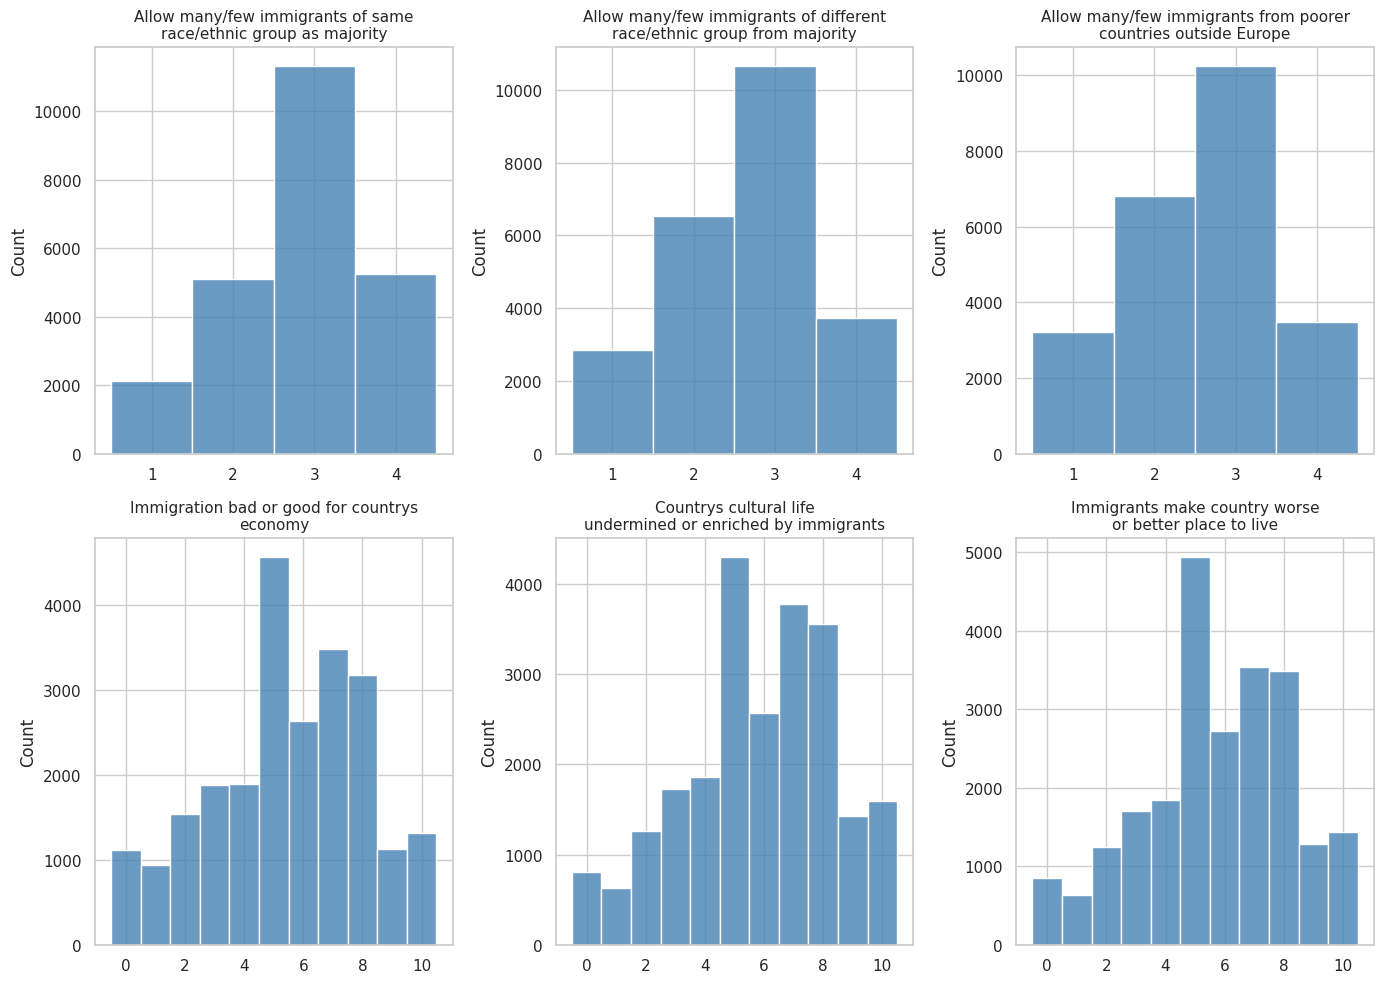

In [24]:
# Global seaborn styling (easy to tweak)
sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=1.0
)

fig, axs = plt.subplots(2, 3, figsize=(14, 10))

plots = [
    (
        'Allow many/few immigrants of same race/ethnic group as majority',
        'Allow many/few immigrants of same\nrace/ethnic group as majority'
    ),
    (
        'Allow many/few immigrants of different race/ethnic group from majority',
        'Allow many/few immigrants of different\nrace/ethnic group from majority'
    ),
    (
        'Allow many/few immigrants from poorer countries outside Europe',
        'Allow many/few immigrants from poorer\ncountries outside Europe'
    ),
    (
        'Immigration bad or good for countrys economy',
        'Immigration bad or good for countrys\neconomy'
    ),
    (
        'Countrys cultural life undermined or enriched by immigrants',
        'Countrys cultural life\nundermined or enriched by immigrants'
    ),
    (
        'Immigrants make country worse or better place to live',
        'Immigrants make country worse\nor better place to live'
    )
]

# Flatten axes for easy iteration
axs = axs.flatten()

for ax, (col, title) in zip(axs, plots):
    sns.histplot(
        data=df_v3,
        x=col,
        discrete=True,  # because my variables are discrete likert scales and otherwise the bins are weird             
        color="steelblue",
        alpha=0.8,
        edgecolor="white",
        ax=ax
    )
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


I also want to deal with outliers in my numeric data because their presence may skew my results later and reduce accuracy of my analysis. To do this, I have adapted the [interquartile method](https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/) used by Geeks for Geeks.

In [25]:
# create a function that takes in the column you want to apply the code to as well as the data set. 
def remove_outliers(column, df):
    column = df[str(column)]
    #  # calculate the first quartile (25th percentile)
    q1 = column.quantile(0.25)
    #calculate the third quartile (75th percentile)
    q3 = column.quantile(0.75)
    # calculate interquartile
    iqr = q3-q1
    # define upper limit for non-outliers
    upper = q3+(1.5 * iqr)
    # defint lower limit for non-outliers
    lower = q1 - (1.5 *iqr)
    #return a df with the values outside of these bounds removed (i.e. no outliers)
    df = df[(column >= lower) & (column <= upper)]
    # return the dataframe
    return df

In [26]:
# now use the function 

Next, I will look at descriptive variables for the independent, non-numeric variables. I will plot bar charts and create percentages for each. 

In [27]:
# I first need a count of each unique value. by selecting normalise as true, we see the value as a proportion, multiply by 100 to get %. https://www.geeksforgeeks.org/python/python-pandas-series-value_counts/ 
income_bins = df_v3["Households net income"].value_counts(normalize=True) * 100

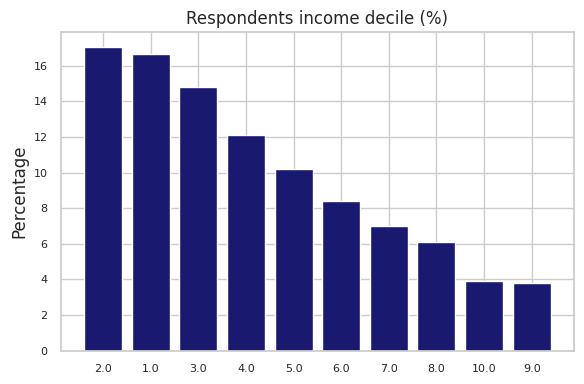

In [28]:
plt.figure(figsize=(6,4))
plt.bar(income_bins.index.astype(str), income_bins.values, color='midnightblue')  # x is the deciles, y is my %
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel ='Income deciles'
plt.ylabel('Percentage')
plt.title('Respondents income decile (%)')
plt.tight_layout()
plt.show()

In [29]:
orig_education_bins = df_v3['Highest lvl of Ed_recoded'].value_counts().astype(int)
orig_education_bins

Highest lvl of Ed_recoded
Leaving Certificate Established (LCE); Leaving Certificate Vocational Programme (LCVP)     2654
Junior Certificate                                                                         2340
Left school after the end of primary school but before reaching the end of junior cycle    1699
Higher level/honours bachelor degree                                                       1300
Diploma                                                                                    1277
Masters Degree, M.Phil                                                                     1043
Leaving Certificate Applied programme                                                       934
Higher Certificate                                                                          634
Higher/Graduate Diploma                                                                     627
Post-graduate Diploma                                                                       592
Post-Leaving C

In [30]:
# there are way too many ed categories, even the names are too long to plot. We're collapse these into somethin less granular.
highest_ed_collapsed = {
    1.0: 'Primary or less',  # left school early
    2.0: 'Lower secondary',  # before end of junior cycle
    3.0: 'Lower secondary',  # Junior Certificate
    4.0: 'Upper secondary / vocational',  # NFQ 3
    5.0: 'Upper secondary / vocational',  # NFQ 4
    6.0: 'Upper secondary / leaving cert', # LCE / LCVP
    7.0: 'Upper secondary / leaving cert', # LCA
    8.0: 'Apprenticeship',  # FAS/SOLAS
    9.0: 'Post-secondary / vocational',    # PLC 1 year
    10.0: 'Post-secondary / vocational',   # PLC 2+ years
    11.0: 'Post-secondary / vocational',   # HNC / BTEC
    12.0: 'Undergraduate',                 # Higher Certificate
    13.0: 'Undergraduate',                 # Diploma
    14.0: 'Undergraduate',                 # Bachelor honours
    15.0: 'Undergraduate',                 # Graduate Diploma
    16.0: 'Postgraduate',                  # Postgraduate Diploma
    17.0: 'Postgraduate',                  # Masters / MPhil
    18.0: 'Postgraduate',                  # PhD
    5555.0: 'Other'
}

# copy mapping from above
df_v3['Highest_ed_collapsed'] = df_v3['Highest lvl of Ed'].map(highest_ed_collapsed)

In [31]:
ed_bins = df_v3['Highest_ed_collapsed'].value_counts(normalize=True) * 100

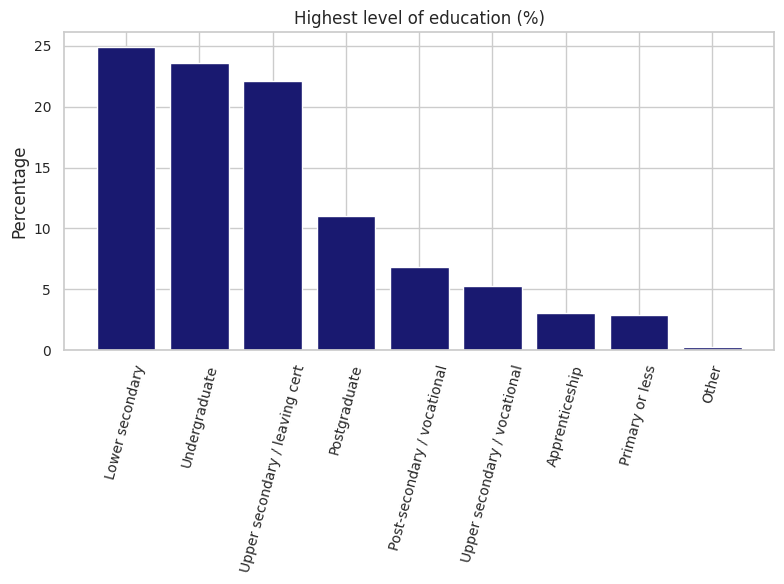

In [32]:
plt.figure(figsize=(8,6))
plt.bar(ed_bins.index.astype(str), ed_bins.values, color='midnightblue')  # x is the deciles, y is my %
plt.xticks(rotation = 75) # https://kanoki.org/how-to-prevent-xticks-overlapping-in-matplotlib 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel ='Highest education level'
plt.ylabel('Percentage')
plt.title('Highest level of education (%)')
plt.tight_layout()
plt.show()

### Part 4: Analysis

Question 1: How has the average attitude to immigration changed in Ireland over time?

I want to present the two sets of immigrant attitude questions separately because they have different scales and presenting together is misleading

In [33]:
# get some data ready for plotting to seaborn.
# groupby our ess year and get average of the 6 immigrant attitude fields stored in cols_imm
# see: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html 
imm_attitudes_allow = (
    df_v3.groupby('ess_fieldwork_start_year')[cols_imm_allow]
      .mean()
      .reset_index()
)

In [34]:
# get some data ready for plotting to seaborn.
# groupby our ess year and get average of the 6 immigrant attitude fields stored in cols_imm
# see: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html 
imm_attitudes_contrib = (
    df_v3.groupby('ess_fieldwork_start_year')[cols_imm_contrib]
      .mean()
      .reset_index()
)

In [35]:
# show result
#imm_attitudes_contrib
imm_attitudes_allow

,ess_fieldwork_start_year,Allow many/few immigrants of same race/ethnic group as majority,Allow many/few immigrants of different race/ethnic group from majority,Allow many/few immigrants from poorer countries outside Europe
0,2002,2.973083,2.690270,2.689690
1,2004,2.939640,2.671338,2.720270
2,2006,2.937571,2.755277,2.720864
3,2008,2.788068,2.627484,2.544628
4,2010,2.600946,2.458893,2.390582
5,2012,2.686411,2.528251,2.453947
6,2014,2.648591,2.479434,2.277586
7,2016,2.794430,2.589253,2.597130
8,2018,3.006416,2.817973,2.751607
9,2020,3.002865,2.869390,2.803603


In [36]:
# In order to use this data on a seaborn plot, seaborn prefers the data to be long rather than wide: https://www.statology.org/seaborn-plot-multiple-lines/ 
# for this i can use the melt function: https://pandas.pydata.org/docs/reference/api/pandas.melt.html 

In [37]:
imm_attitudes_allow_long = imm_attitudes_allow.melt(
    id_vars='ess_fieldwork_start_year', # what column to use as identifier
    value_vars=cols_imm_allow, # what to unpivot/pivot. In this case imm cols
    var_name='question', # what to call newly pivoted column
    value_name='mean_score' # what to call the vales, in our case they're means.
)

In [38]:
imm_attitudes_contrib_long = imm_attitudes_contrib.melt(
    id_vars='ess_fieldwork_start_year', # what column to use as identifier
    value_vars=cols_imm_contrib, # what to unpivot/pivot. In this case imm cols
    var_name='question', # what to call newly pivoted column
    value_name='mean_score' # what to call the vales, in our case they're means.
)

In [39]:
imm_attitudes_allow_long.head()
imm_attitudes_contrib_long.head()

,ess_fieldwork_start_year,question,mean_score
0,2002,Immigration bad or good for countrys economy,4.991291
1,2004,Immigration bad or good for countrys economy,5.853978
2,2006,Immigration bad or good for countrys economy,6.053571
3,2008,Immigration bad or good for countrys economy,5.022248
4,2010,Immigration bad or good for countrys economy,4.378560


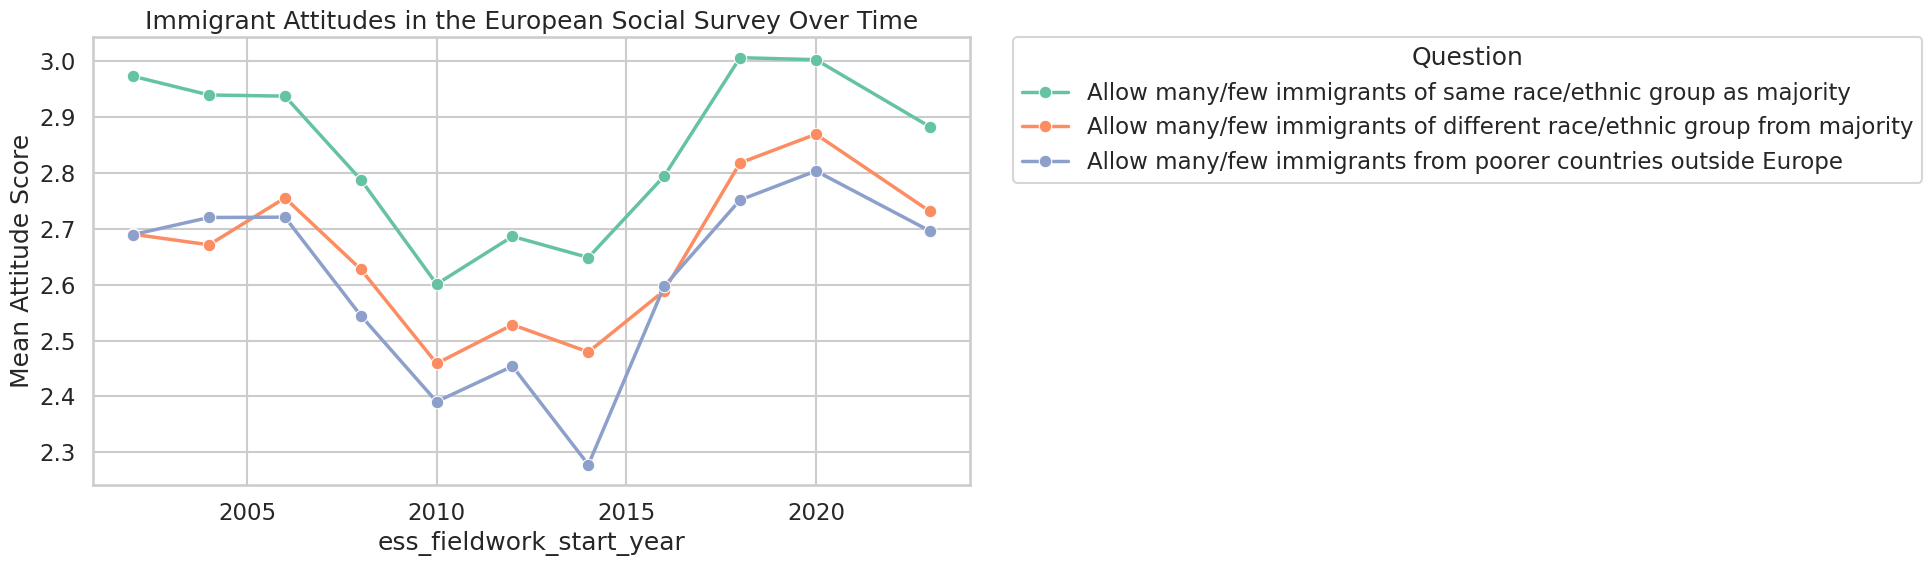

In [40]:
sns.set_theme(style="whitegrid", context="talk") #chosen from https://python-graph-gallery.com/104-seaborn-themes/ 

plt.figure(figsize=(20, 6))

sns.lineplot(
    data=imm_attitudes_allow_long,
    x='ess_fieldwork_start_year',
    y='mean_score',
    hue='question',  # determines the lines
    marker='o',
    linewidth=2.5,
    palette='Set2' # chosen from https://seaborn.pydata.org/tutorial/color_palettes.html 
)

plt.ylabel("Mean Attitude Score")
plt.title("Immigrant Attitudes in the European Social Survey Over Time")

plt.legend(
    title="Question",
    bbox_to_anchor=(1.05, 1),  # right of plot
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

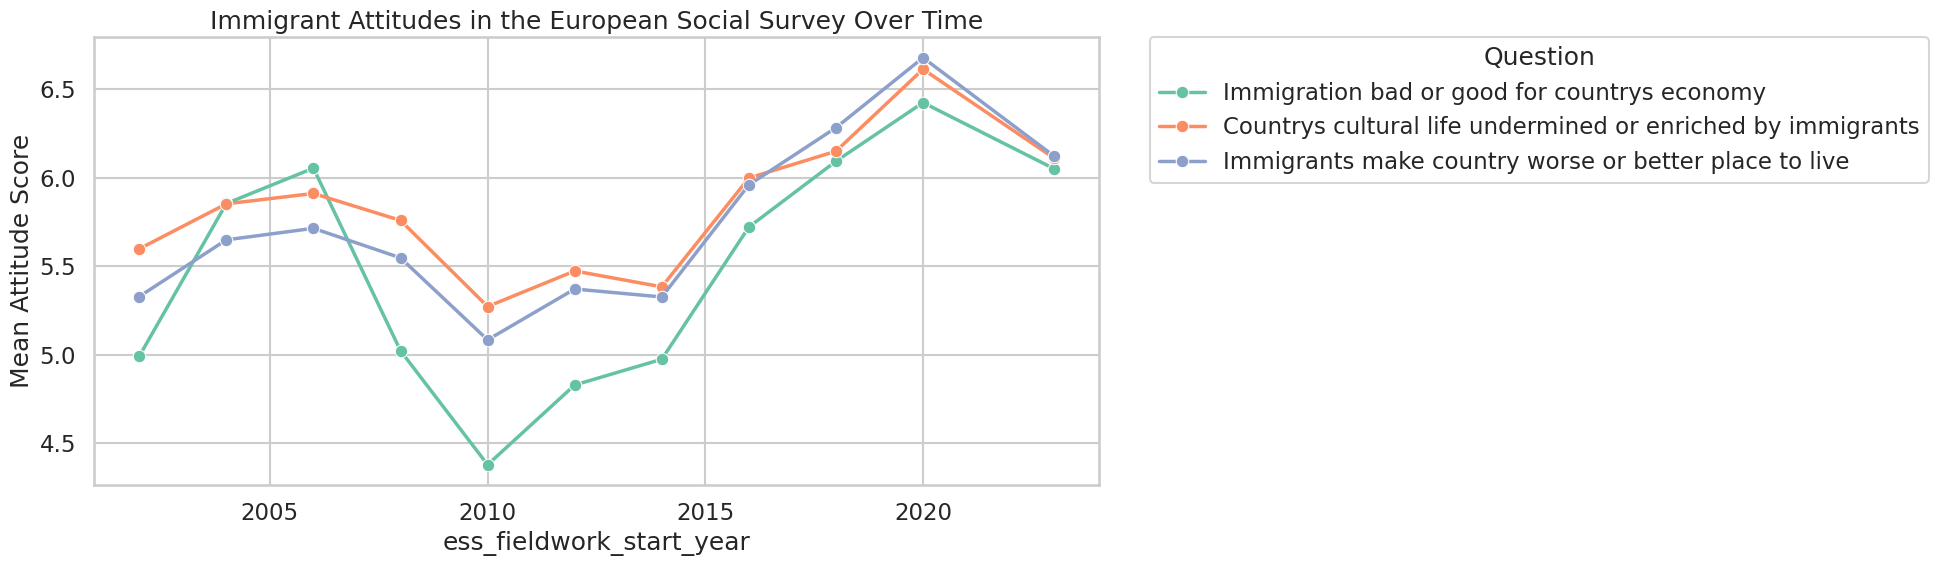

In [41]:
sns.set_theme(style="whitegrid", context="talk") #chosen from https://python-graph-gallery.com/104-seaborn-themes/ 

plt.figure(figsize=(20, 6)) # set the size

sns.lineplot(
    data=imm_attitudes_contrib_long, #choose the melted data
    x='ess_fieldwork_start_year',
    y='mean_score',
    hue='question', # determines the lines
    marker='o',
    linewidth=2.5,
    palette='Set2'# chosen from https://seaborn.pydata.org/tutorial/color_palettes.html 
)
# set labels and titles
plt.ylabel("Mean Attitude Score")
plt.title("Immigrant Attitudes in the European Social Survey Over Time")

#stick outside because it keeps overlapping
plt.legend(
    title="Question",
    bbox_to_anchor=(1.05, 1),  # right of plot
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

It appears from the graphs that the two scales follow similarly trajectories. I will inspect the relationship between all of these variables to determine if having positie attitudes in one regard correlates with others. For this, I will use [Pandas Corr() Method](https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-corr/)

In [42]:
# pass the corr method my immigrant columns. I'm selecting the pearson correlation method. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 
corr_coeff = df_v3[cols_imm].corr(method='pearson')

In [43]:
# plot a heatmap type table for showcasing the correlation matrix. See: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html 
corr_plot = corr_coeff.style.background_gradient(cmap="Blues").format(precision = 3) # rounds the numeric values in the table to 3 decimal places.
corr_plot


,Allow many/few immigrants of same race/ethnic group as majority,Allow many/few immigrants of different race/ethnic group from majority,Allow many/few immigrants from poorer countries outside Europe,Immigration bad or good for countrys economy,Countrys cultural life undermined or enriched by immigrants,Immigrants make country worse or better place to live
Allow many/few immigrants of same race/ethnic group as majority,1.000,0.798,0.709,0.486,0.449,0.475
Allow many/few immigrants of different race/ethnic group from majority,0.798,1.000,0.807,0.522,0.507,0.537
Allow many/few immigrants from poorer countries outside Europe,0.709,0.807,1.000,0.500,0.473,0.503
Immigration bad or good for countrys economy,0.486,0.522,0.500,1.000,0.695,0.737
Countrys cultural life undermined or enriched by immigrants,0.449,0.507,0.473,0.695,1.000,0.770
Immigrants make country worse or better place to live,0.475,0.537,0.503,0.737,0.770,1.000


Key Insights from Question 1:
- From 2002 to 2024, people in Ireland consistently showed greater support for allowing immigrants of the same race or ethnicity as the majority to live in the country than for other groups.
- Support for immigration declined across all groups at two key points: following the 2008 financial crisis and during the 2020 COVID-19 pandemic.
- Attitudes toward immigrants’ contributions to society followed a similar pattern, with the sharpest decline occurring in perceptions of immigrants’ economic impact after the 2008 crash.
- Attitudes about hw many immigrants should be allowed to live in Ireland correlated moderately with attitudes on immigrants' cpotential contribution to a country.

Question 2: How does socio-economic background (e.g. income level, educational attainment) relate to attitudes to immigration in Ireland?

Starting with education, it is clear there are too many education and income categories to undertand the relation with attitudes. Therefore, I created collapsed versions of each. For education, I created a binary variable to indicate whether or not someone has attained a third-level qualification. For income, I have deemed deciles 1-3 as "low income, deciles 4-7 as middle income and deciles 8-10 as "high income". 

In [44]:
# first make the values for education
highest_ed_binary_labels = {1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0, 7.0: 0, 8.0: 0, 9.0: 0, 10.0: 0, 11.0: 0, 12.0: 0, 13.0: 0, 14.0: 1, 15.0: 1, 16.0: 1, 17.0: 1, 18.0: 1, 5555.0: 0}
# then map the values for education https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html 
df_v3['Third_lvl_binary'] = df_v3['Highest lvl of Ed'].map(highest_ed_binary_labels)

In [45]:
# next make the income variable labels
# see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html 
income_labels_grouped =  {'1st': 'Low income', '2nd': 'Low income', '3rd': 'Low income', '4th': 'Middle income', '5th': 'Middle income', '6th': 'Middle income', '7th': 'Middle income', '8th': 'High income', '9th': 'High income', '10th': 'High income'}
df_v3['Income grouped'] = df_v3['Households net income'].map(income_labels_grouped)


In [46]:
df_v3['Households net income'].unique()
df_v3['Income grouped'].unique()

array([nan], dtype=object)

Next, we can explore bivariate analysis. 

In [47]:
# get some data ready for plotting to seaborn.
# groupby our ess year and get average of the 6 immigrant attitude fields stored in cols_imm
# see: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html 
imm_attitudes_income = (
    df_v3.groupby('Income grouped')[cols_imm]
      .mean()
      .reset_index()
)

In [48]:
# melt again but this time for income
imm_attitudes_income_long = imm_attitudes_income.melt(
    id_vars='Income grouped', # what column to use as identifier
    value_vars=cols_imm, # what to unpivot/pivot. In this case imm cols
    var_name='question', # what to call newly pivoted column
    value_name='mean_score' # what to call the vales, in our case they're means.
)

In [49]:
# do the same for education

In [50]:
# get some data ready for plotting to seaborn.
# groupby our ess year and get average of the 6 immigrant attitude fields stored in cols_imm
# see: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html 
imm_attitudes_education = (
    df_v3.groupby('Third_lvl_binary')[cols_imm]
      .mean()
      .reset_index()
)

In [51]:
# melt again but this time for education
imm_attitudes_education_long = imm_attitudes_education.melt(
    id_vars='Third_lvl_binary', # what column to use as identifier
    value_vars=cols_imm, # what to unpivot/pivot. In this case imm cols
    var_name='question', # what to call newly pivoted column
    value_name='mean_score' # what to call the vales, in our case they're means.
)

/tmp/ipykernel_2089/2703508182.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No third-level", "Third-level"])
/tmp/ipykernel_2089/2703508182.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No third-level", "Third-level"])
/tmp/ipykernel_2089/2703508182.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No third-level", "Third-level"])
/tmp/ipykernel_2089/2703508182.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No third-level", "Third-level"])
/tmp/ipykernel_2089/2703508182.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of t

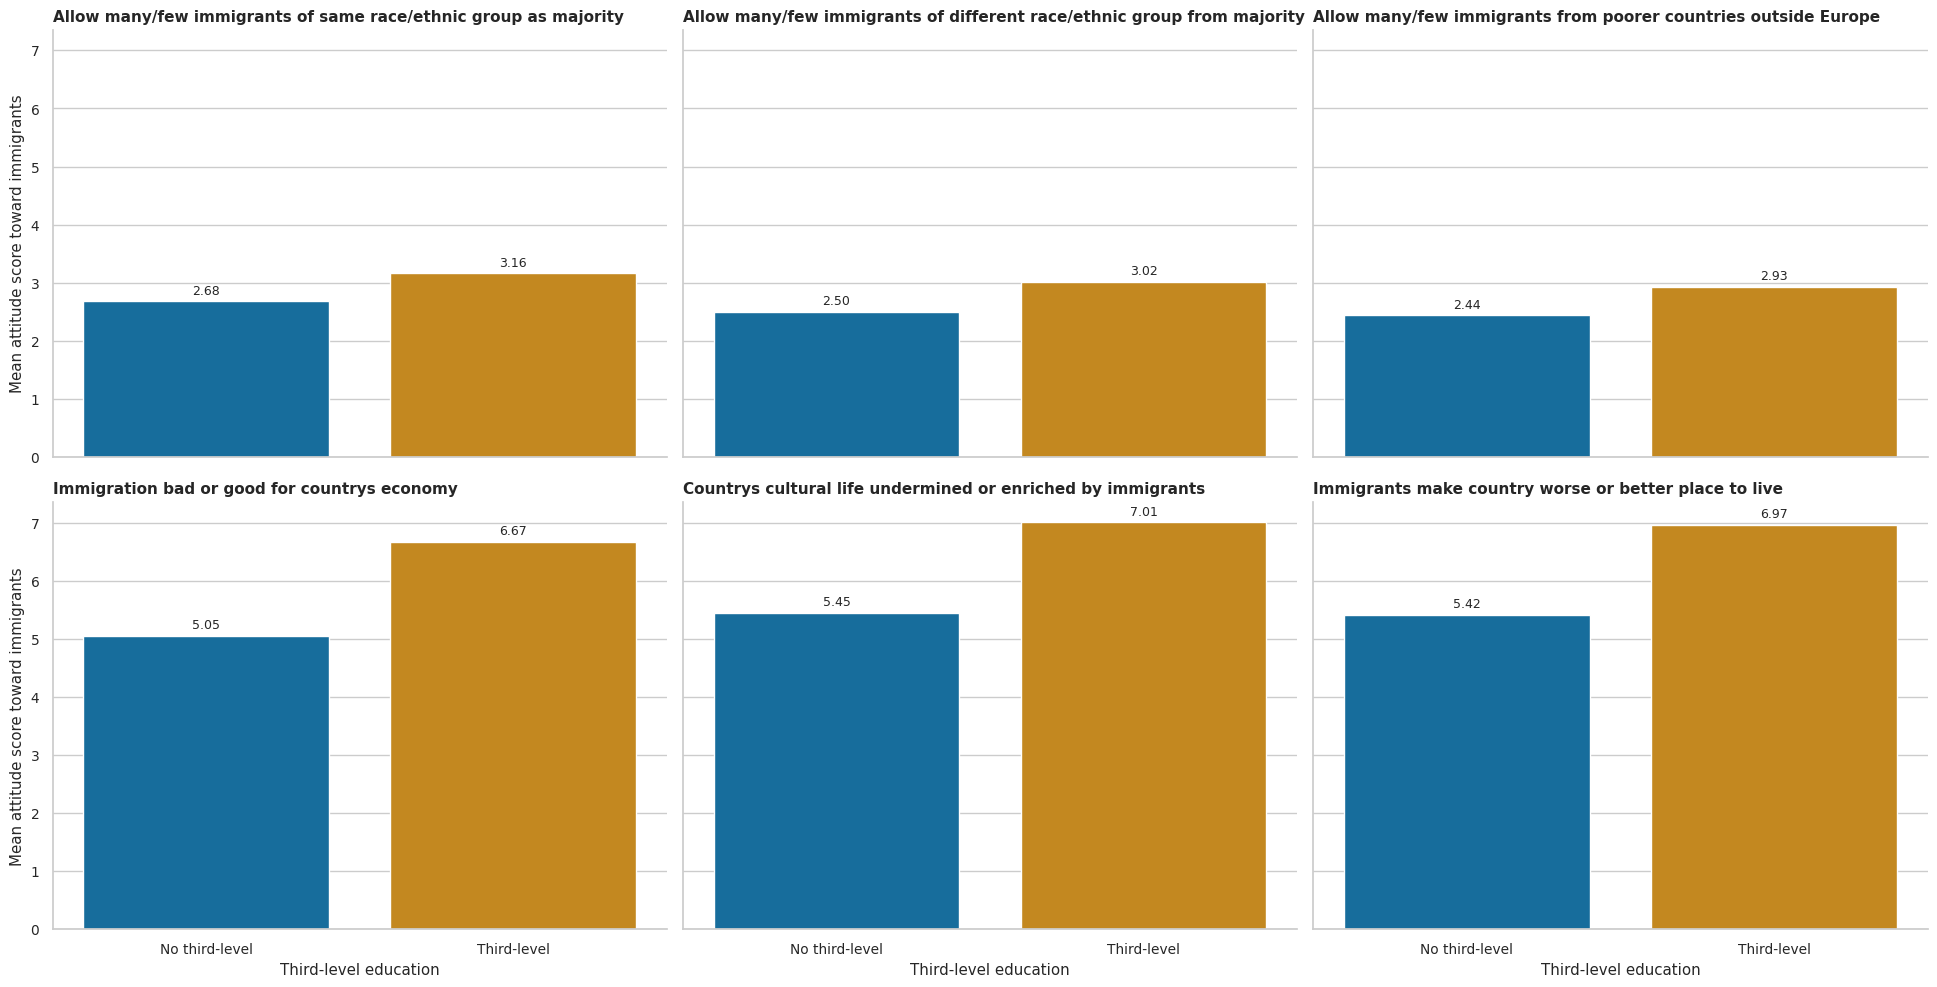

In [62]:
# Initialize the FacetGrid. see: https://seaborn.pydata.org/tutorial/axis_grids.html 
# solution to long titles found: https://stackoverflow.com/questions/10351565/how-do-i-fit-long-title 


import textwrap # module that helps format plain text, i need it for my v long titles. see: https://www.geeksforgeeks.org/python/textwrap-text-wrapping-filling-python/ 

sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=0.9
)

g = sns.catplot(
    data=imm_attitudes_education_long,
    x="Third_lvl_binary",
    y="mean_score",
    col="question",
    kind="bar",
    col_wrap=3,
    sharey=True,
    height=5.0,
    aspect=1.3,
    palette="colorblind",
    ci=None
)

# THIS removes the duplicated title text
g.set_titles(
    col_template="{col_name}",
    size=11,
    weight="bold",
    loc="left"
)

for ax in g.axes.flatten():
    ax.set_title("")  # remove any existing title because some default one plus my specified one were overlapping

g.set_axis_labels(
    "Third-level education",
    "Mean attitude score toward immigrants"
)

for ax in g.axes.flatten():
    ax.set_xticklabels(["No third-level", "Third-level"])

for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt="%.2f",
            fontsize=9,
            padding=3
        )
g.tight_layout()
plt.show()

Now we can use inferential statistics to test whether these differences are statistically significant or just a matter of chance.

In [ ]:
third_lvl_education = df_v3[df_v3['Third_lvl_binary'] == 1]['Allow many/few immigrants of same race/ethnic group as majority']
no_third_lvl_education = df_v3[df_v3['Third_lvl_binary'] == 0]['Allow many/few immigrants of same race/ethnic group as majority']

First I need to check if my variance is equal or not. For this, I'll use [levene's test](https://stats.libretexts.org/Workbench/Learning_Statistics_with_SPSS_-_A_Tutorial_for_Psychology_Students_and_Other_Beginners/11%3A_Comparing_Several_Means_(One-way_ANOVA)/11.07%3A_Checking_the_Homogeneity_of_Variance_Assumption) fas it is the most common.

In [ ]:
# We need to check for equal variances before deciding which type of test to use.
from scipy.stats import levene

# define alpha
alpha = 0.05
# now we pass the groups and center value
# from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value = levene(third_lvl_education, no_third_lvl_education,
                          center='mean')

if p_value > alpha:
    print("We do not reject the null hypothesis")
else:
    print("Reject the Null Hypothesis")

Reject the Null Hypothesis


In [ ]:
# scipy has a built in anova function. see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html 
# let's try adapt the loop for the t-tests but with the anova

# Now I know i need to set equal variance to false. Writea loop that checks t test for each of the six immigrant columns. This is largely adapted from datacamp but turned into a loop.
# iterate for each column in cols_imm
for col in cols_imm:
    # attitudes for group 0 (no higher ed)
    group0 = df_v3.loc[df_v3['Third_lvl_binary'] == 0, col].dropna()

    # attitudes for group 1 (some higher ed)
    group1 = df_v3.loc[df_v3['Third_lvl_binary'] == 1, col].dropna()

    ## Using the internal function from SciPy Package  https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests 
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)

    # print the t stat and p value
    print(f"{col}: t = {t_stat:.3f}, p = {p_value:.3f}")

Allow many/few immigrants of same race/ethnic group as majority: t = -32.001, p = 0.000
Allow many/few immigrants of different race/ethnic group from majority: t = -32.857, p = 0.000
Allow many/few immigrants from poorer countries outside Europe: t = -30.558, p = 0.000
Immigration bad or good for countrys economy: t = -37.315, p = 0.000
Countrys cultural life undermined or enriched by immigrants: t = -36.686, p = 0.000
Immigrants make country worse or better place to live: t = -37.786, p = 0.000


For the income groups, we have more than two comparison groups and one independent variable so we need to use [a one-way Anova]

In [ ]:
# Now I know i need to set equal variance to false. Writea loop that checks t test for each of the six immigrant columns. This is largely adapted from datacamp but turned into a loop.
# iterate for each column in cols_imm
from scipy.stats import f_oneway
for col in cols_imm:
    # attitudes for group 0 (no higher ed)
    group0 = df_v3.loc[df_v3['Income grouped'] == "High income", col].dropna()

    # attitudes for group 1 (some higher ed)
    group1 = df_v3.loc[df_v3['Income grouped'] == "Middle income", col].dropna()

     # attitudes for group 1 (some higher ed)
    group2 = df_v3.loc[df_v3['Income grouped'] == "Low income", col].dropna()

    ## Using the internal function from SciPy Package  https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests 
    f_stat, p_value = f_oneway(group0, group1, group2, axis=0, equal_var=False, nan_policy='propagate')

    # print the t stat and p value
    print(f"{col}: F = {f_stat:.3f}, p = {p_value:.3f}")

Allow many/few immigrants of same race/ethnic group as majority: F = 330.216, p = 0.000
Allow many/few immigrants of different race/ethnic group from majority: F = 308.178, p = 0.000
Allow many/few immigrants from poorer countries outside Europe: F = 251.444, p = 0.000
Immigration bad or good for countrys economy: F = 350.941, p = 0.000
Countrys cultural life undermined or enriched by immigrants: F = 314.474, p = 0.000
Immigrants make country worse or better place to live: F = 319.782, p = 0.000
